# AM 205 - Assignment 2
## By Jonathan Guillotte-Blouin

In [326]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import sys

$\newcommand{\N}{\mathbb{N}}
\newcommand{\Z}{\mathbb{Z}}
\newcommand{\Q}{\mathbb{Q}}
\newcommand{\R}{\mathbb{R}}
\newcommand{\B}{\mathbb{B}}
\renewcommand{\P}{\mathbb{P}}
\newcommand{\p}{\partial}
\newcommand{\Trans}{\mathsf{T}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\vx}{\vec{x}}
\newcommand{\vb}{\vec{b}}$

### Question 1: Norms and Newton root-finding

a) Find four points $b \in \R^2$ such that $||b||_2 = 1$ and $||Ab||_2=1$. Plot the two curves $||x||_2=1$ and $||Ax||_2=1$ and mark the points $b$ on this plot.

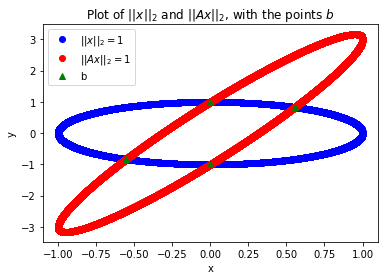

In [612]:
domain_1a = np.linspace(0,2*np.pi, 10000)

# generate the points using ellipse functions
domain_x1a = [np.cos(t) for t in domain_1a]
values_x1a = [np.sin(t) for t in domain_1a]
domain_Ax1a = [np.sin(t) for t in domain_1a]
values_Ax1a = [-np.cos(t) + 3 * np.sin(t) for t in domain_1a]
domain_intersect1a = [2/np.sqrt(13), -2/np.sqrt(13), 0, 0]
values_intersect1a = [3/np.sqrt(13), -3/np.sqrt(13), 1, -1]

plt.title(r'Plot of $||x||_2$ and $||Ax||_2$, with the points $b$')
plt.plot(domain_x1a, values_x1a, 'bo', label=r'$||x||_2 = 1$', linestyle='None')
plt.plot(domain_Ax1a, values_Ax1a, 'ro', label=r'$||Ax||_2 = 1$', linestyle='None')
plt.plot(domain_intersect1a, values_intersect1a, 'g^', label='b', linestyle='None');
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

##### How did I find the four points $b$?

We have
$A = \left[\begin{array}{cc}
	3 & -1 \\
	1 & 0
      \end{array}\right]$
and
$b = \left[\begin{array}{c}
	x \\
	y
      \end{array}\right]$. By the constraints of the problem, we can infer these two equations:
      
1. $x^2 + y^2 = 1$ (because $||b||_2 = 1$)
2. $10x^2 - 6xy + y^2 = 1$ (because $||Ab||_2 = 1$)

$$x^2 + y^2 = 10x^2 - 6xy + y^2$$
$$9x^2 - 6xy = 0$$
$$3x(3x - 2y) = 0$$

We have two possibilities to satisfy the system

Case 1. $3x = 0$ (therefore $x = 0$)

Case 2. $3x - 2y = 0$ (therefore $x = \frac{2}{3}y$)

Given equation 1, we know that $y = \sqrt{1 - x^2}$. If $x=0$ (case 1), then we have two points: $(0,1)$ and $(0,-1)$. For the second case,

$$x^2 + y^2 = (\frac{2}{3}y)^2 + y^2 = \frac{4}{9}y^2 + y^2 = \frac{13}{9}y^2 = 1$$
$$y = \sqrt{\frac{9}{13}} = \frac{3}{\sqrt{13}}$$

If $y = \frac{3}{\sqrt{13}}$, then we know that $x = \frac{2}{3}y = \frac{2}{\sqrt{13}}$. We therefore have two new points: $(\frac{2}{\sqrt{13}}, \frac{3}{\sqrt{13}})$ and $(-\frac{2}{\sqrt{13}}, -\frac{3}{\sqrt{13}})$.

To restate: our four points are $(0,1)$, $(0,-1)$, $(\frac{2}{\sqrt{13}}, \frac{3}{\sqrt{13}})$, and $(-\frac{2}{\sqrt{13}}, -\frac{3}{\sqrt{13}})$.

b) Find four points $c \in \R^2$ such that $||c||_{\infty} = 1$ and $||Ac||_{\infty}=1$. Plot the two curves $||x||_{\infty}=1$ and $||Ax||_{\infty}=1$ and mark the points $c$ on this plot.

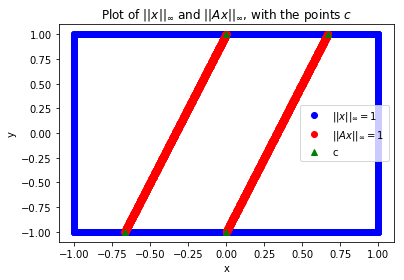

In [613]:
domain_1b = np.linspace(-1,1, 1000)

domain_x1b = []
values_x1b = []
domain_Ax1b = []
values_Ax1b = []
for x in domain_1b:
    if abs(x) != 1:
        domain_x1b += [x, x]
        values_x1b += [1, -1]
    else:
        domain_x1b += [x] * 1000
        values_x1b += [x for x in domain_1b]
        
    for y in domain_1b:
        if abs(max(abs(3*x - y), abs(x)) - 1) < 0.01: # I use an epsilon 0.01 here as an approximation measure
            domain_Ax1b.append(x)
            values_Ax1b.append(y)
domain_intersect1b = [2/3, -2/3, 0, 0]
values_intersect1b = [1, -1, 1, -1]     
        
plt.title(r'Plot of $||x||_\infty$ and $||Ax||_\infty$, with the points $c$')
plt.plot(domain_x1b, values_x1b, 'bo', label=r'$||x||_\infty = 1$', linestyle='None')
plt.plot(domain_Ax1b, values_Ax1b, 'ro', label=r'$||Ax||_\infty = 1$', linestyle='None')
plt.plot(domain_intersect1b, values_intersect1b, 'g^', label='c', linestyle='None');
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

##### How did I find the four points $c$?

We have
$A = \left[\begin{array}{cc}
	3 & -1 \\
	1 & 0
      \end{array}\right]$
and
$c = \left[\begin{array}{c}
	x \\
	y
      \end{array}\right]$. By the constraints of the problem, we can infer these two equations (with corresponding conditions):
      
1. $||c||_\infty = \texttt{max}(|x|, |y|) = 1 \implies -1 \leq x \leq 1, -1 \leq y \leq 1, (x = \pm1 \, \texttt{OR} \, y = \pm1)$
2. $||Ac||_\infty = \texttt{max}(|3x-y|, |x|) = 1 \implies -1 \leq 3x - y \leq 1, -1 \leq x \leq 1, (x = \pm1 \, \texttt{OR} \, 3x - y = \pm1)$

If $x = 1$, then (second equation) $|3x-y| = |3-y| \leq 1$, but that is impossible considering that $|y| \leq 1$ (equation 1). So, $|3x-y|$ must be equal to 1.


If $y = 1$, then $|3x - 1| = 1 \implies x = \frac{2}{3}, x = 0$. These two points satisfy all of our conditions, so $(\frac{2}{3}, 1)$ and $(0, 1)$ are our first two points.

If $y = -1$, then $|3x + 1| = 1 \implies x = -\frac{2}{3}, x = 0$. These two points satisfy all of our conditions, so $(-\frac{2}{3}, -1)$ and $(0, -1)$ are our last two points.

To restate: our four points are $(\frac{2}{3}, 1)$, $(0, 1)$, $(-\frac{2}{3}, -1)$, and $(0, -1)$.

c) Write a program to find four solutions to the equation $f(d) = (0,0)$ using the vector generalization of the Newton root finding method. 

In [572]:
def build_jacobian(d):
    x = d[0]
    y = d[1]
    
    jacobian = np.zeros((2,2))
    
    jacobian[0][0] = x**3 / (x**4+y**4)**(3/4)
    jacobian[0][1] = y**3 / (x**4+y**4)**(3/4)
    jacobian[1][0] = (4*x**3 + 12*(3*x-y)**3)/(4*((3*x-y)**4 + x**4)**(3/4))
    jacobian[1][1] = -(3*x-y)**3 / ((3*x-y)**4 + x**4)**(3/4)
    
    return jacobian

def f_xk(A, d):
    return np.array([np.linalg.norm(d, 4) - 1, np.linalg.norm(np.dot(A,d), 4) - 1]).T

def compute_newton(A, d):
    return np.linalg.solve(build_jacobian(d), -f_xk(A, d))

A = np.array([[3, -1], [1, 0]])
seeds_x = []
seeds_y = []
ds_x = []
ds_y = []
for _ in range(50): # try 50 different seeds
    xk = np.array([sp.stats.uniform.rvs(-10,20), sp.stats.uniform.rvs(-10,20)]).T # random seed
    seeds_x.append(xk[0])
    seeds_y.append(xk[1])


    while True:
        sk = compute_newton(A, xk)
        xk += sk

        if np.linalg.norm(sk,1) < 0.000000000000001:
           break

    ds_x.append(xk[0])
    ds_y.append(xk[1])

Text(0,0.5,'y')

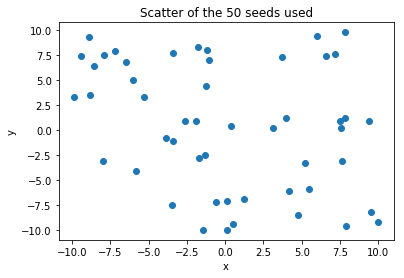

In [570]:
plt.scatter(seeds_x, seeds_y)
plt.title("Scatter of the 50 seeds used")
plt.xlabel("x")
plt.ylabel("y")

Text(0,0.5,'y')

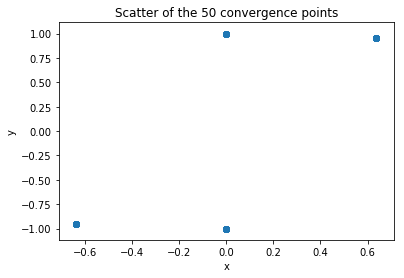

In [573]:
plt.scatter(ds_x, ds_y)
plt.title("Scatter of the 50 convergence points")
plt.xlabel("x")
plt.ylabel("y")

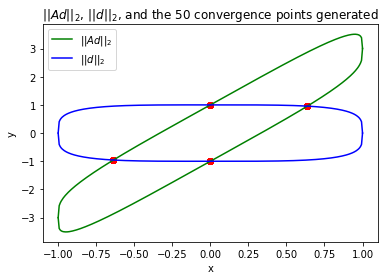

In [600]:
def generate_d_y(x):
    return (1 - x**(4))**(1/4)
            
def generate_pos_Ad_y(x):
    return 3*x - (1 - x**4)**(1/4)

def generate_neg_Ad_y(x):
    return 3*x + (1 - x**4)**(0.25)

domain_x1c = np.linspace(-1, 1, 300)
    
plt.plot(domain_x1c, generate_pos_Ad_y(domain_x1c), color='g', label=r'$||Ad||_{2}$')
plt.plot(domain_x1c, generate_neg_Ad_y(domain_x1c), color='g')
plt.plot(domain_x1c, generate_d_y(domain_x1c), color='b', label=r'$||d||_{2}$')
plt.plot(domain_x1c, -generate_d_y(domain_x1c), color='b')
plt.scatter(ds_x, ds_y, color='r')
plt.title(r'$||Ad||_{2}$, $||d||_{2}$, and the 50 convergence points generated')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Our points $d$ seem to be the same as the points $c$, except with some imprecision due to the nature of finding them via Newton's method. The four points are 
* $(-0.6372899387668439, -0.9559349081502658)$, which is close to $(-\frac{2}{3}, -1)$
* $(1.5973912007953097e-17, -1.0)$, which is close to $(0,-1)$
* $(0.6372899387668438, 0.9559349081502658)$, which is close to $(\frac{2}{3}, 1)$
* $(-2.3129673919044513e-17, 1.0)$, which is close to $(0,1)$

d) Show that the 12 points $b$, $c$, and $d$ lie on two straight lines, and why.

Text(0,0.5,'y')

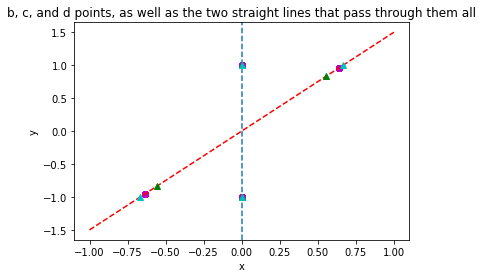

In [779]:
line_1 = lambda x: 3*x/2

domain_x1d = np.linspace(-1,1,10)

plt.plot(domain_x1d, line_1(domain_x1d), color='r', linestyle='--') # line 1
plt.axvline(0, linestyle='--') # line 2
plt.plot(domain_intersect1a, values_intersect1a, 'g^', label='b');
plt.plot(domain_intersect1b, values_intersect1b, 'c^', label='c');
plt.scatter(ds_x, ds_y, color='m')
plt.title("b, c, and d points, as well as the two straight lines that pass through them all")
plt.xlabel("x")
plt.ylabel("y")

So, why are these two straight lines passing through the three families of points?

If we look at the constraints described in *b)*, we know that the points in *c* pass through three different pairs of lines:

* $y = 1$ and $y = -1$
* $y = 3x-1$ and $y = 3x+1$
* $y = \frac{3x}{2}$ and $x = 0$

If we look at the constraints described in *a*, we know that the points in *b* must satisfy:
* $x^2 + y^2 = 1$ and
* $(3x-y)^2 + x^2 = 1$

If we substract them, we get

$$ y^2 - (3x-y)^2 = 0$$
$$ y = 3x - y \texttt{ or } y = -3x + y$$
$$ y = \frac{3x}{2} \texttt{ or } x = 0$$

The first two pairs of lines satisfying points in *c* are discarded, but the third pair of lines could still satisfy points in *b* and *c*. But, does it satisfy points in *d*? These points have the following constraints:
* $x^4 + y^4 = 1$ and
* $(3x-y)^4 + x^4 = 1$

If we substract them, we get

$$ y^4 - (3x-y)^4 = 0$$
$$ y = 3x - y \texttt{ or } y = -3x + y$$
$$ y = \frac{3x}{2} \texttt{ or } x = 0$$

Points in *d* have not added any constraints, which makes sense because they follow the same pattern as points in *b*. Therefore, the third pair of straight lines $y = \frac{3x}{2}$ and $x = 0$ satisfy all three families of points, which is why these two specific lines pass through all the points.

### Question 2: LU factorization for binary numbers

a) Write a function `fsolve`.



In [160]:
def is_not_binary_matrix(A):
    return np.any(A < 0) or np.any(A > 1)

def fsolve(L, b, no_singular=True):
    # check L and B are binary
    if is_not_binary_matrix(L) or is_not_binary_matrix(b):
        print("We work with binary digits, L or b is not right!")
        sys.exit()
    
    # check L
    for i in range(len(L)):
        row = L[i]
        
        if no_singular and row[i] == 0:
            print("Diagonal element == 0; singular matrices are not accepted!")
            sys.exit()
        
        if np.any(row[i+1:] != 0):
            print("This is not a valid lower triangular matrix!")
            sys.exit()
    
    # check b
    if b.shape != (len(L), 1):
        print("b should be a vector of length {}".format(len(L)))
        sys.exit()

    # solve Lx = b
    x = np.zeros((len(b),1),dtype=np.int8)
    for i in range(len(L)):
        li_left = L[i][:i] # coefficients in L on the current row, but to the left of the diagonal
        summedTerms = 0
        for j in range(len(li_left)):
            summedTerms ^= li_left[j] & x[j][0] # += lij * xj0
            
        bi = b[i][0]
        xi = bi ^ summedTerms # no need to divide by lii, as it has to be "1s" on the diagonal
        x[i] = np.array([xi],dtype=np.int8)

    return x

l=np.array([[1,0,0,0],[0,1,0,0],[1,1,1,0],[1,0,1,1]],dtype=np.int8)
b=np.array([[1,],[1],[0],[0]],dtype=np.int8)

fsolve(l,b)

array([[1],
       [1],
       [0],
       [1]], dtype=int8)

b) Write a function `rsolve`.

In [151]:
def rsolve(L, b, no_singular=True):
    # check L and B are binary
    if is_not_binary_matrix(L) or is_not_binary_matrix(b):
        print("We work with binary digits, L or b is not right!")
        sys.exit()
    
    # check L
    for i in range(len(L)):
        row = L[i]
        
        if no_singular and row[i] == 0:
            print("Diagonal element == 0; singular matrices are not accepted!")
            sys.exit()
        
        if np.any(row[:i] != 0):
            print("This is not a valid upper triangular matrix!")
            sys.exit()
    
    # check b
    if b.shape != (len(L), 1):
        print("b should be a vector of length {}".format(len(L)))
        sys.exit()

    # solve Lx = b
    x = np.zeros((len(b),1),dtype=np.int8)
    for i in reversed(range(len(L))):
        li_right = L[i][i+1:] # coefficients in L on the current row, but to the right of the diagonal
        summedTerms = 0
        for j in range(len(li_right)):
            summedTerms ^= li_right[j] & x[i+j+1][0] # we need to do x[i+j+1] to get the right index in `x`, because `li_right` is dephased
            
        bi = b[i][0]
        xi = bi ^ summedTerms # no need to divide by lii, as it has to be "1s" on the diagonal
        x[i] = np.array([xi],dtype=np.int8)

    return x

u=np.array([[1,1,1,1],[0,1,1,1],[0,0,1,1],[0,0,0,1]],dtype=np.int8)

rsolve(u,b)

array([[0],
       [1],
       [0],
       [0]], dtype=int8)

c) Write a program to calculate the LU factorization with partial pivoting.

In [762]:
def get_PLU(A):
    n = len(A)
    P = np.identity(n, dtype=np.int8)
    L = np.identity(n, dtype=np.int8)
    U = A.copy()

    for j in range(n-1):
        # Select row index i >=j that has the biggest U[i][j]
        max_i = j
        for i in range(j, n):
            if U[i][j] > U[max_i][j]:
                max_i = i
    
        # Note: swaps have to copy, because the native swap of Python does not work with numpy matrices
        # swap U
        tmp_U_submatrix = np.copy(U[j][j:n])
        U[j][j:n] = U[max_i][j:n]
        U[max_i][j:n] = tmp_U_submatrix
        
        # Note: swaps have to copy, because the native swap of Python does not work with numpy matrices
        # swap L
        tmp_L_submatrix = np.copy(L[j][0:j])
        L[j][0:j] = L[max_i][0:j]
        L[max_i][0:j] = tmp_L_submatrix
        
        # swap P
        P[[max_i,j]] = P[[j,max_i]]
        
        # Reduce values in U, and update L correspondingly
        for i in range(j+1, n):
            L[i][j] = U[i][j]

            for k in range(j,n):
                U[i][k] ^= L[i][j] & U[j][k]
    
    return (P, L, U)

A1 = np.array([[1,0,0,1],[1,1,0,0],[0,1,1,1],[1,0,1,0]],dtype=np.int8)
get_PLU(A1)

(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=int8), array([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 1, 1]], dtype=int8), array([[1, 0, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=int8))

d) Find the solutions $x$ to both linear systems (small and large)

In [763]:
# taken from the files
def bin_mul(c,d):
    # Check that the dimensions of the matrices are compatible
    (m,n)=c.shape
    (nn,p)=d.shape
    if n!=nn:
        print("Matrix size mismatch")
        sys.exit()

    # Initalize blank matrix of integer zeros
    e=np.zeros((m,p),dtype=np.int8)

    # Calculate each term, using "&" instead of "*" and "^" instead of "+"
    for i in range(m):
        for j in range(p):
            for k in range(n):
                e[i,j]=e[i,j]^(c[i,k]&d[k,j])
    return e

def LU(A, b, no_singular=True):
    P, L, U = get_PLU(A)
    
    pb = bin_mul(P, b)
    y = fsolve(L, pb)
    return (P, L, U, rsolve(U, y))

b1 = np.array([[1],[1],[0],[1]],dtype=np.int8)
LU(A1, b1)

(array([[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=int8), array([[1, 0, 0, 0],
        [1, 1, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 1, 1]], dtype=int8), array([[1, 0, 0, 1],
        [0, 1, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 1]], dtype=int8), array([[1],
        [0],
        [0],
        [0]], dtype=int8))

In [764]:
def read_file_into_matrix(path_to_file):
    with open(path_to_file) as f:
        content = f.readlines()
        return np.array([x.strip().split(" ") for x in content],dtype=np.int8)
        
A_small, b_small = read_file_into_matrix("a_small.txt"), read_file_into_matrix("b_small.txt")

print("Ax = b (for small)")
P_small, L_small, U_small, x_small = LU(A_small, b_small, no_singular=False)
print(x_small)
print("\n")

A_big, b_big = read_file_into_matrix("a_big.txt"), read_file_into_matrix("b_big.txt")

print("Ax = b (for big)")
P_big, L_big, U_big, x_big = LU(A_big, b_big, no_singular=False)
print(x_big)

Ax = b (for small)
[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]


Ax = b (for big)
[[0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]]


### Question 3: The light game

a) Write a program that creates a 49x49 binary matrix $A$ such that $Ax = b$

Text(0.5,1,'Representation of grid A: similar to the one on Piazza')

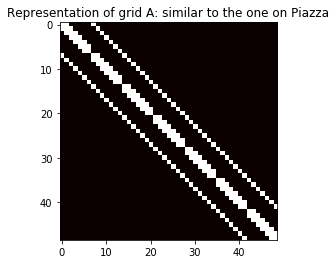

In [765]:
def gather_neighbours(i, j, m, n):
    neighbours = [i * n + j]
    
    if i - 1 >= 0:
        neighbours.append((i-1) * n + j)
    
    if j - 1 >= 0:
        neighbours.append(i * n + j - 1)
        
    if j + 1 < n:
        neighbours.append(i * n + j + 1)
        
    if i + 1 < m:
        neighbours.append((i+1) * n + j)
    
    return neighbours

def build_grid_A(m=7, n=7):
    A = np.zeros((m*n,m*n),dtype=np.int8)

    for i in range(m):
        for j in range(n):
            neighbours = gather_neighbours(i, j, m, n)
            
            for neighbour in neighbours:
                A[i*n+j][neighbour] = 1
                
    return A

gridA = build_grid_A()
plt.imshow(gridA, cmap='hot')
plt.title("Representation of grid A: similar to the one on Piazza")

b) For each of the patterns given below, use your binary LU solver from Question 2 to determine the correct presses.

Text(0.5,1.05,'Case 1')

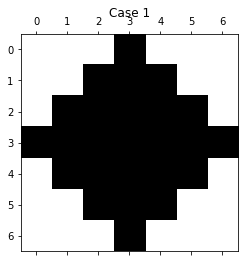

In [766]:
def build_vector_b(lits):
    b = np.zeros((49,1),dtype=np.int8)
    
    for lit in lits:
        b[lit] = 1
    
    return b

b1 = build_vector_b([3, 9, 10, 11, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 37, 38, 39, 45])
x1 = LU(gridA, b1, no_singular=False)[3]
plt.spy(b1.reshape((7,7)))
plt.title("Case 1")

Text(0.5,1.05,'Presses to render Case 1')

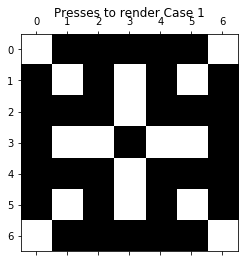

In [767]:
plt.spy(x1.reshape((7,7)))
plt.title("Presses to render Case 1")

Text(0.5,1.05,'Case 2')

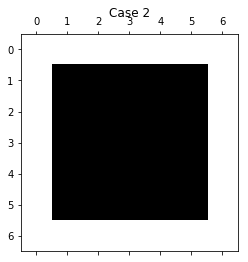

In [768]:
b2 = build_vector_b([i*7+j for i in range(7) for j in range(7) if (i != 0 and i != 6 and j != 0 and j != 6)])
x2 = LU(gridA, b2, no_singular=False)[3]
plt.spy(b2.reshape((7,7)))
plt.title("Case 2")

Text(0.5,1.05,'Presses to render Case 2')

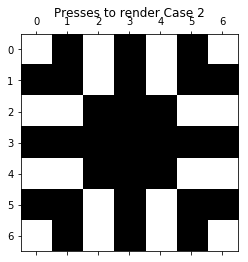

In [769]:
plt.spy(x2.reshape((7,7)))
plt.title("Presses to render Case 2")

Text(0.5,1.05,'Case 3')

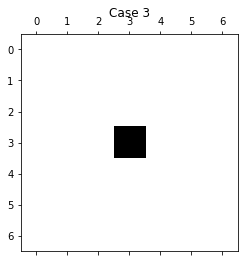

In [770]:
b3 = build_vector_b([24])
x3 = LU(gridA, b3, no_singular=False)[3]
plt.spy(b3.reshape((7,7)))
plt.title("Case 3")

Text(0.5,1.05,'Presses to render Case 3')

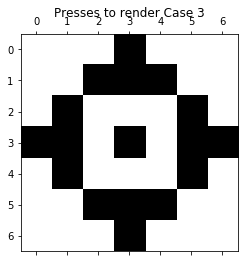

In [771]:
plt.spy(x3.reshape((7,7)))
plt.title("Presses to render Case 3")

Text(0.5,1.05,'Case 4')

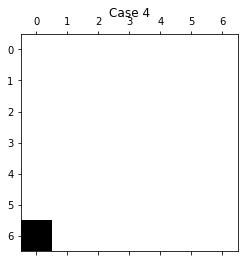

In [772]:
b4 = build_vector_b([42])
x4 = LU(gridA, b4, no_singular=False)[3]
plt.spy(b4.reshape((7,7)))
plt.title("Case 4")

Text(0.5,1.05,'Presses to render Case 4')

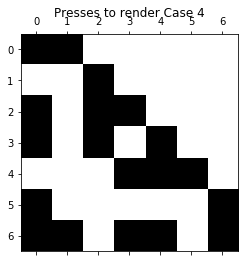

In [773]:
plt.spy(x4.reshape((7,7)))
plt.title("Presses to render Case 4")

Text(0.5,1.05,'Case 5')

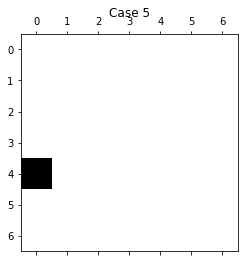

In [774]:
b5 = build_vector_b([28])
x5 = LU(gridA, b5, no_singular=False)[3]
plt.spy(b5.reshape((7,7)))
plt.title("Case 5")

Text(0.5,1.05,'Presses to render Case 5')

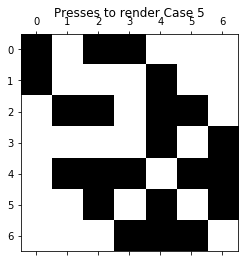

In [775]:
plt.spy(x5.reshape((7,7)))
plt.title("Presses to render Case 5")

Text(0.5,1.05,'Custom case')

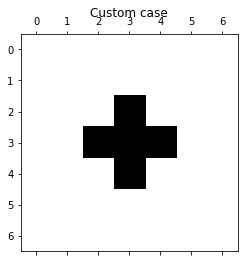

In [776]:
b_custom = build_vector_b([17,23,24,25,31])
x_custom = LU(gridA, b_custom, no_singular=False)[3]
plt.spy(b_custom.reshape((7,7)))
plt.title("Custom case")

Text(0.5,1.05,'Presses to render Custom case')

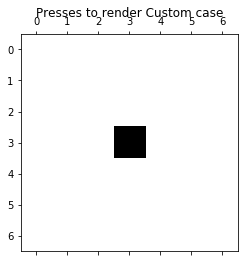

In [777]:
plt.spy(x_custom.reshape((7,7)))
plt.title("Presses to render Custom case")

c) Determine the dimension of the null space for each $mxn$ grid with $m,n \in \{1,2,...,9\}$

In [286]:
for i in range(1,10):
    for j in range(1,10):
        rankA = np.linalg.matrix_rank(build_grid_A(i, j))
        dimNullSpace = i*j - rankA # according to problem description
        print("Dimension of null space of grid ({},{}): {}\n".format(i, j, dimNullSpace))

Dimension of null space of grid (1,1): 0

Dimension of null space of grid (1,2): 1

Dimension of null space of grid (1,3): 0

Dimension of null space of grid (1,4): 0

Dimension of null space of grid (1,5): 1

Dimension of null space of grid (1,6): 0

Dimension of null space of grid (1,7): 0

Dimension of null space of grid (1,8): 1

Dimension of null space of grid (1,9): 0

Dimension of null space of grid (2,1): 1

Dimension of null space of grid (2,2): 0

Dimension of null space of grid (2,3): 1

Dimension of null space of grid (2,4): 0

Dimension of null space of grid (2,5): 1

Dimension of null space of grid (2,6): 0

Dimension of null space of grid (2,7): 1

Dimension of null space of grid (2,8): 0

Dimension of null space of grid (2,9): 1

Dimension of null space of grid (3,1): 0

Dimension of null space of grid (3,2): 1

Dimension of null space of grid (3,3): 0

Dimension of null space of grid (3,4): 0

Dimension of null space of grid (3,5): 1

Dimension of null space of grid (3

### Question 4: Difficult cases for LU factorization

a) Write a function `generate_g` that returns $G_n$.

In [294]:
def generate_g(n):
    Gn = np.identity(n,dtype=np.int8)
    
    for i in range(n):
        for j in range(n):
            if i == j: # do nothing on the diagonal
                continue
                
            if i == n-1: # last row
                Gn[i][j] = -1                
            elif j == n-1: # last column
                Gn[i][j] = 1 
            elif j <  i: # lower triangle
                Gn[i][j] = -1
                
    return Gn

generate_g(9)

array([[ 1,  0,  0,  0,  0,  0,  0,  0,  1],
       [-1,  1,  0,  0,  0,  0,  0,  0,  1],
       [-1, -1,  1,  0,  0,  0,  0,  0,  1],
       [-1, -1, -1,  1,  0,  0,  0,  0,  1],
       [-1, -1, -1, -1,  1,  0,  0,  0,  1],
       [-1, -1, -1, -1, -1,  1,  0,  0,  1],
       [-1, -1, -1, -1, -1, -1,  1,  0,  1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1]], dtype=int8)

b) Measure time execution of `generate_g` for $n=10,20,...,1000$.

In [309]:
from time import time
ns = np.linspace(10, 1000, 100,dtype=np.int)
g_times = []
for n in ns:
    start_time = time()
    g = generate_g(n)
    elapsed_time = time() - start_time
    
    g_times.append(elapsed_time)

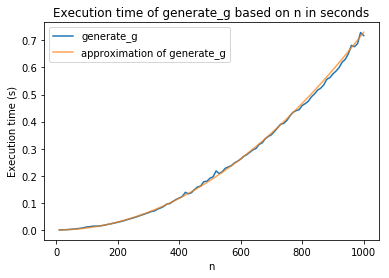

In [321]:
g_alpha = 0.00000073
g_beta = 2
g_approximation_times = []

for n in ns:
    g_approximation_times.append(g_alpha * n**g_beta)

plt.plot(ns, g_times, label="generate_g")
plt.plot(ns, g_approximation_times, alpha=0.7, label="approximation of generate_g")
plt.title("Execution time of generate_g based on n in seconds")
plt.ylabel("Execution time (s)")
plt.xlabel("n")
plt.legend()

As we can see on the graph, the approximation function is pretty much exactly the same as the real execution time of `generate_g`. The approximation function is $0.00000073 \cdot n^2$. So $\alpha=0.00000073$, and $\beta=2$.

The value of $\beta$ is quite reasonable: we build an identity matrix ($n^2$), then we do two nested loops of size n ($n^2$), where trivial operations occur inside ($1$). `generate_g` is therefore $O(n^2)$, which concurs with the value for $\beta$.

c) Solve the system $G_n\hat{x} = b$ using LU factorization. Plot the 2-norm relative error.

In [359]:
ns = np.linspace(10, 200, 20,dtype=np.int)
two_norm_errs = []

for n in ns:
    x = np.ones((n, 1),dtype=np.int)
    Gn = generate_g(n)
    b = Gn.dot(x)
    P, L, U = sp.linalg.lu(Gn)
    Pb = P.dot(b)
    y = sp.linalg.solve_triangular(L, Pb)
    x_hat = sp.linalg.solve_triangular(U, y)
    two_norm_errs.append(np.linalg.norm(x - x_hat, 2))

Text(0.5,0,'n')

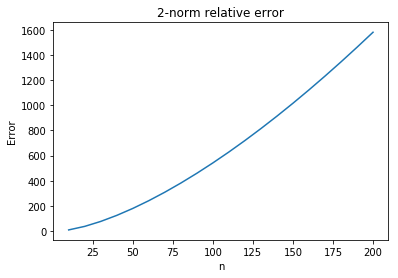

In [360]:
plt.plot(ns, two_norm_errs)
plt.title("2-norm relative error")
plt.ylabel("Error")
plt.xlabel("n")

Gaussian reduction requires a lot of multiplication and division of values resulting in $L$ and $U$. If $n$ grows, then errors are more probable to happen.

This topic has been studied in [this paper](http://www.math.sjsu.edu/~foster/geppfail.pdf). They state that the error growth, with significant $n$, even reaches an exponential trend!

### Question 5: QR factorization using Givens rotation, applied to a bouncing ball

a) Write a program that performs the QR factorization using Givens rotation

In [379]:
def build_givens(i, j, a1, a2, m):
    c, s = 0, 0
    if abs(a1) > abs(a2):
        t = a2/a1
        c = 1 / np.sqrt(1 + t**2)
        s = c * t
    else:
        tau = a1/a2
        s = 1 / np.sqrt(1 + tau**2)
        c = s * tau

    G = np.identity(m)    
    G[i][i] = c
    G[j][j] = c
    G[i][j] = s
    G[j][i] = -s
    
    return G

def QR(A):
    m, n = A.shape
    R = A.copy()
    Q = np.identity(m)
    
    for k in range(n):
        for j in reversed(range(k+1, m)):
            if R[j][k] == 0: # no need to anhilate an already null value
                continue
                
            G = build_givens(j, k, R[j][k], R[k][k], m)
            R = np.matmul(G,R)
            Q = np.matmul(Q, G.T)
            
    return (Q, R)

In [391]:
for i in range(10):
    A = np.random.randint(10, size=(11,7))
    Q, R = QR(A)
    A_app = np.matmul(Q, R)
    print("Trial {}: frobenius norm of `A - QR` = {}".format(i+1, np.linalg.norm(A_app - A, 'fro')))

Trial 1: frobenius norm of `A - QR` = 1.6395247537815725e-14
Trial 2: frobenius norm of `A - QR` = 1.0524608772637197e-14
Trial 3: frobenius norm of `A - QR` = 1.3187961241917077e-14
Trial 4: frobenius norm of `A - QR` = 1.1323061538706078e-14
Trial 5: frobenius norm of `A - QR` = 6.806468934929472e-15
Trial 6: frobenius norm of `A - QR` = 9.680109169485477e-15
Trial 7: frobenius norm of `A - QR` = 1.784763800369139e-14
Trial 8: frobenius norm of `A - QR` = 7.206643444970893e-15
Trial 9: frobenius norm of `A - QR` = 6.6316326555454424e-15
Trial 10: frobenius norm of `A - QR` = 5.894697882528171e-15


b)

i) Using your QR factorization code, fit each of the three different arcs.

In [442]:
def build_ball_A(times):
    A = np.ones((len(times),3))
    
    for i in range(len(times)):
        time = times[i]
        A[i][0], A[i][1] = time**2, time
    
    return A

# each arc in its row (values are currently pixels)
ball_ys = [[
    31.6452217364, 52.4041585445, 107.775599129, 197.422881356, 320.715789474, 337.955035971 # 6x1
], [
    236.268292683, 169.049204052, 136.072368421, 136.948700866, 171.529282577, 239.911519199, 341.876763876 # 7x1
], [
    339.846356453, 259.478021978, 213.351943463, 201.063214526, 222.523504274, 278.286053883, 369.234096692 # 7x1
]]

# change pixels to meters
for i in range(len(ball_ys)):
    ball_ys[i] = [(42.5 / 43.5) * y / 1000 for y in ball_ys[i]]

# time frames separated by arcs
ball_times = []
time_ctr = 0
for arc in ball_ys:
    time_arc = []
    
    for _ in arc:
        time_arc.append(time_ctr * 7 / 120)
        time_ctr += 1
        
    ball_times.append(time_arc)
    
ball_As = [build_ball_A(ball_time) for ball_time in ball_times]

"""
x = [alpha, beta, gamma]^T
"""

ball_alphas = []
ball_betas = []
ball_gammas = []
for i in range(len(ball_ys)):
    numF = len(ball_ys[i]) # how many frames in the arc
    Q, R = QR(ball_As[i])
    Qtb = np.matmul(Q.T, np.array(ball_ys[i]).reshape(numF,1))
    x = np.linalg.lstsq(R, Qtb, rcond=None)[0]
    
    alpha, beta, gamma = x[0][0], x[1][0], x[2][0]
    ball_alphas.append(alpha)
    ball_betas.append(beta)
    ball_gammas.append(gamma)
    print("For arc {}, we got:\nalpha={}\nbeta={}\ngamma={}\n".format(i+1, alpha, beta, gamma))
    print("From this approximated x, we would get the following times (b):\n{}\n\n".format(np.matmul(ball_As[i],x)))

For arc 1, we got:
alpha=1.3027504119335938
beta=0.7810228592039895
gamma=0.016103373553735346

From this approximated x, we would get the following times (b):
[[0.01610337]
 [0.06609601]
 [0.12495459]
 [0.19267911]
 [0.26926956]
 [0.35472596]]


For arc 2, we got:
alpha=4.854153804710756
beta=-4.801361203373702
gamma=1.3165387049133228

From this approximated x, we would get the following times (b):
[[0.23069612]
 [0.16534561]
 [0.13303031]
 [0.13375022]
 [0.16750534]
 [0.23429568]
 [0.33412123]]


For arc 3, we got:
alpha=4.899948144157956
beta=-9.065846281102392
gamma=4.389288922520125

From this approximated x, we would get the following times (b):
[[0.33216595]
 [0.25350765]
 [0.20819622]
 [0.19623167]
 [0.21761398]
 [0.27234316]
 [0.36041921]]




ii) Find

A) the gravitational acceleration $g$

We know that $y''(t) = 2 \cdot \alpha = a(t) = g$.

So our experimental acceleration would be:
$$g_1 = 1.3027504119335938 \cdot 2 = 2.6055008238671875 \frac{m}{s^2}$$
$$g_2 = 4.854153804710756 \cdot 2 = 9.708307609421512 \frac{m}{s^2}$$
$$g_3 = 4.899948144157956 \cdot 2 = 9.799896288315912 \frac{m}{s^2}$$

$g_2$ and $g_3$ are impressively close to the real value of $g$, which is $9.764\frac{m}{s^2} \leq g \leq 9.834 \frac{m}{2^2}$, according to [Wikipedia](https://en.wikipedia.org/wiki/Gravitational_acceleration).

$g_1$ is really not close: it could be explained by the fact that the ball is still in contact with the hand in the first frame or two, which could apply a force (hence, changing the acceleration) on the ball at that time.

If we ignore $g_1$, our $\hat{g}$ is $9.754101948868712 \frac{m}{s^2}$.

In [470]:
(9.708307609421512 + 9.799896288315912)/2

9.754101948868712

B) the height *h* at which the ball was dropped

First, I will find at which time $t$ the first and second arcs predict the same height. That point in time should be when the ball hits the table top. Then, I will compute the $y$ in the first equation to find the $\Delta y$ between time 0 and time $t$. Last step is to add the radius of the ball to the $\Delta y$.

In [456]:
diff_alpha = ball_alphas[0] - ball_alphas[1]
diff_beta = ball_betas[0] - ball_betas[1]
diff_gamma = ball_gammas[0] - ball_gammas[1]

ball_t = np.roots([diff_alpha, diff_beta, diff_gamma])[1] # [1.28746579, 0.28441537] ... by logic, we know that the first bounce has to be around 0.2~0.3s
ball_delta_y = ball_alphas[0] * ball_t**2 + ball_betas[0] * ball_t # gamma term is canceled by `ball_y0 = gamma`
print("The height h is {}mm".format(ball_delta_y * 1000 + 42.5/2)) # don't forget radius of the ball

The height h is 348.76712159674094mm


c) the coefficient of restitution *e*

At time $t$ previously computed, we want to compute $y_1'(t) = v_1(t)$ and compare it to $v_2(t)$. Reckon that $y'(t) = 2 \cdot \alpha t + \beta$.

In [469]:
ball_v1 = 2 * ball_alphas[0] * ball_t + ball_betas[0]
ball_v2 = 2 * ball_alphas[1] * ball_t + ball_betas[1]

print("Coefficient of restitution e is {} (first bounce)".format(abs(ball_v2/ball_v1)))

# let's compute `e` for the seond bounce too
diff_alpha2 = ball_alphas[1] - ball_alphas[2]
diff_beta2 = ball_betas[1] - ball_betas[2]
diff_gamma2 = ball_gammas[1] - ball_gammas[2]

ball_t2 = np.roots([diff_alpha2, diff_beta2, diff_gamma2])[1] # [92.39632966,  0.72620752] ... by logic, we take the second time
ball_v2t2 = 2 * ball_alphas[1] * ball_t2 + ball_betas[1]
ball_v3t2 = 2 * ball_alphas[2] * ball_t2 + ball_betas[2]

print("Coefficient of restitution e is {} (second bounce)".format(abs(ball_v3t2/ball_v2t2)))

Coefficient of restitution e is 1.3403936103528462 (first bounce)
Coefficient of restitution e is 0.8666908966664176 (second bounce)


Obviously, the first value of *e* makes no sense; it would assume that the ball had more energy after bouncing than before. This is due to the bad value of $\alpha_1$. The coefficient $e_2$ is reasonable, so let's assume that this value is the real coefficient of restitution.

iii) Calculate the time in seconds that a ball will come to rest from a height *h*.

Pose $\Delta t_{0,1}$ is the time between the drop and the first bounce, and $\Delta t_{i,i+1} \, \texttt{where} \, i > 0$ is the time between bounces $i$ and $i+1$. We assume that the bounces take negligeable time.

What we are looking for is $\Delta t = \Delta t_{0,1} + \sum_{i=1}^{\infty}\Delta t_{i,i+1}$.

The speed at the beginning and end of an arc $\{i,i+1\}$ are respectively $v_i$ and $-v_i$.

$$\Delta t_{i,i+1} = \frac{\Delta v_{i,i+1}}{a} = \frac{2v_i}{a}$$

If we assume that the coefficient of restitution $e$ is constant, then $v_i = e \cdot v_{\texttt{just before i}}$. Therefore,

$$\Delta t_{i,i+1} = \frac{2 \cdot e \cdot v_{\texttt{just before i}}}{a}$$

Pose $\phi = \frac{2 \cdot e}{g} \approx \frac{ 2 \cdot 0.8666908966664176}{9.754101948868712} \approx 0.17770798402756843$. Then,

$$\Delta t_{i,i+1} = \phi \cdot v_{\texttt{just before i}}$$

Kinematics says that $\Delta y = v_0 \Delta t + \frac{a\Delta t^2}{2}$. The initial speed is 0 when we drop the ball, the acceleration is $g$, and $\Delta y$ is $h$, therefore

$$\Delta t_{0,1} = \sqrt{\frac{2h}{g}}$$

Again using kinematics, we derive that $v_{\texttt{just before 1}} = g \Delta t_{0,1} = g \sqrt{\frac{2h}{g}} = \sqrt{2 \cdot h \cdot g}$.

Hence, 

$$\Delta t_{1,2} = \phi \cdot v_{\texttt{just before 1}}$$

$$\Delta t_{2,3} = \phi \cdot v_{\texttt{just before 2}} = \phi \cdot e \cdot v_{\texttt{just before 1}} = \Delta t_{1,2} \cdot e$$

$$\Delta t_{3,4} = \phi \cdot v_{\texttt{just before 3}} = \phi \cdot e \cdot v_{\texttt{just before 2}} = \phi \cdot e^2 \cdot v_{\texttt{just before 1}} = \Delta t_{1,2} \cdot e^2$$


The pattern is now obvious: we have a geometric series.


$$\sum_{i=1}^{\infty}\Delta t_{i,i+1} = \Delta t_{1,2} + \Delta t_{1,2} \cdot e + \Delta t_{1,2} \cdot e^2 + ... = \frac{\Delta t_{1,2}}{1 - e}$$

Therefore,

$$\Delta t = \Delta t_{0,1} + \frac{\Delta t_{1,2}}{1 - e}$$

$$\Delta t = \sqrt{\frac{2h}{g}} + \frac{\phi \cdot \sqrt{2 \cdot h \cdot g}}{1 - e} \approx 0.4528155710424668\sqrt{h} + 5.887836966531418\sqrt{h} \approx 6.3406525375738845\sqrt{h} \, \texttt{seconds}$$